In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

In [12]:
base_dir = 'rice_leaf_diseases'

In [45]:
#data generator
data_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range = 40,
    horizontal_flip = True,
    vertical_flip = True,
    width_shift_range = 0.2,
    height_shift_range=0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'wrap', #nearest, reflect, wrap,constant
    validation_split = 0.15 #split the data    
)

In [46]:
#Priparing train and validation data
train_generator = data_generator.flow_from_directory(
    base_dir,
    target_size = (150, 150),
    color_mode="rgb", #grayscale 1, rgb 3,rgba 4
    batch_size=6,
    subset='training'
)

validation_generator = data_generator.flow_from_directory(
    base_dir,
    target_size = (150, 150),
    color_mode="rgb",
    batch_size=6,
    subset='validation'
)

Found 102 images belonging to 3 classes.
Found 18 images belonging to 3 classes.


In [47]:
model = tf.keras.Sequential([
  #32 : number of filter, (3,3) dimension must be odd number
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)), #rgb3, rgba4
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'), #hidden layer
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'), #hidden layer
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Conv2D(256, (3,3), activation='relu'), #hidden layer
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Flatten(), #convert 2D to 1D
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(3, activation='softmax') #3 label (more then 2), 2 label use sigmoid
])

In [48]:
#copile the model
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy', #more than 2 label
              metrics=['accuracy']) #matrics name accuracy

In [49]:
#create treshold
THRESHOLD = 0.51
class modelCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy') > THRESHOLD):
      print("\nReached %2.2f%% accuracy, STOP training!!" %(THRESHOLD*100))
      self.model.stop_training = True

# Instantiate a callback object
callbacks = modelCallback()

In [50]:
model.fit(
    train_generator,
    steps_per_epoch = 17, #how much the batch that will be executed in every epoch 102 = 6*17 (batch size * step)
    epochs= 10,
    validation_data = validation_generator, #showing the accuracy of learning process
    validation_steps = 3, #18 = 6*3
    callbacks=[callbacks],
    verbose = 2
)

Epoch 1/10
17/17 - 5s - loss: 1.1441 - accuracy: 0.3529 - val_loss: 1.0842 - val_accuracy: 0.3333
Epoch 2/10
17/17 - 4s - loss: 1.0966 - accuracy: 0.3333 - val_loss: 1.0984 - val_accuracy: 0.3889
Epoch 3/10
17/17 - 4s - loss: 1.1011 - accuracy: 0.3235 - val_loss: 1.0969 - val_accuracy: 0.5000
Epoch 4/10
17/17 - 4s - loss: 1.1003 - accuracy: 0.3333 - val_loss: 1.0974 - val_accuracy: 0.2778
Epoch 5/10
17/17 - 4s - loss: 1.0894 - accuracy: 0.4510 - val_loss: 1.0549 - val_accuracy: 0.5000
Epoch 6/10
17/17 - 4s - loss: 1.1507 - accuracy: 0.4314 - val_loss: 1.1312 - val_accuracy: 0.3333
Epoch 7/10
17/17 - 4s - loss: 1.0411 - accuracy: 0.4510 - val_loss: 0.8928 - val_accuracy: 0.6111

Reached 51.00% accuracy, STOP training!!


In [51]:
from tensorflow import keras 

In [52]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [53]:
img1 = image.load_img('rice_leaf_diseases/bacterial_leaf_blight/DSC_0365.JPG', target_size=(150,150))
img2 = image.load_img('rice_leaf_diseases/brown_spot/DSC_0100.JPG', target_size=(150,150))
img3 = image.load_img('rice_leaf_diseases/leaf_smut/DSC_0293.JPG', target_size=(150,150))
img4 = image.load_img('rice_leaf_diseases/leaf_smut/DSC_0320.JPG', target_size=(150,150))

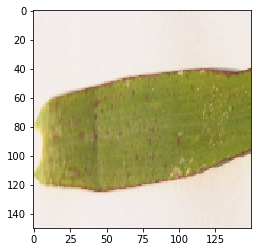

In [98]:
imhplot = plt.imshow(img4)
x = image.img_to_array(img4)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

In [99]:
classes = model.predict(images, batch_size=6)

In [100]:
classes

array([[1.000000e+00, 7.325633e-21, 0.000000e+00]], dtype=float32)

In [97]:
if int(classes[0][0]) == 1:
    print("Bacterial Leaf Blight")
elif int(classes[0][1]) == 1:
    print("Brown Spot")
else:
    print("Leaf Smut")

Brown Spot


## Import Save model

In [64]:
import os.path
if os.path.isfile("model/leaf_model.h5") is False:
    model.save("model/leaf_model.h5")

In [65]:
from tensorflow.keras.models import load_model

In [66]:
new_model = load_model("model/leaf_model.h5")

In [67]:
new_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 15, 15, 256)      

In [68]:
new_model.get_weights()

[array([[[[-2.56810226e-02,  1.15672186e-01, -1.56764999e-01,
            4.10975143e-02,  1.11993000e-01,  5.50262965e-02,
            3.91685143e-02, -3.46012302e-02, -1.20357722e-02,
           -8.15666541e-02,  1.43032134e-01, -7.54891858e-02,
           -1.87280308e-02, -1.35306880e-01, -3.21290903e-02,
           -1.02807529e-01, -5.19021880e-03, -4.93950248e-02,
            6.65845945e-02,  8.17585830e-03,  5.11598885e-02,
           -1.13965467e-01,  1.33886393e-02,  1.28176436e-01,
           -2.38220431e-02,  9.78839695e-02, -1.08206280e-01,
           -9.03361663e-02, -2.84201629e-03, -9.07048583e-02,
            9.98201594e-03,  2.93418244e-02],
          [ 7.79591687e-03,  7.53324106e-02,  6.70921504e-02,
           -1.17159858e-01,  2.80778818e-02, -1.83030665e-02,
           -3.11334021e-02,  1.19404746e-02, -4.67416793e-02,
            5.49912788e-02, -7.10782632e-02, -2.91204881e-02,
            6.49385527e-02,  8.85150507e-02,  3.48946340e-02,
            4.89750206e-

In [69]:
new_model.optimizer

In [73]:
classes = new_model.predict(images, batch_size=6)

In [74]:
classes

array([[0., 1., 0.]], dtype=float32)